In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import joblib

In [2]:
df = pd.read_excel('/Users/maryjones/Elbrus/Study_files/ds-phase-1/06-unsupervised/aux/Sample - Superstore.xls')
df = df[df['Category'] == 'Furniture']

In [3]:
weekly_sales = df.set_index('Order Date')['Sales'].resample('W').sum()

In [4]:
weekly_sales = weekly_sales.to_frame(name='y')  # превращаем Series в DataFrame с колонкой 'y'
data_train = weekly_sales[weekly_sales.index.year < 2017]
data_test  = weekly_sales[weekly_sales.index.year >= 2017]

In [5]:
data_train["year"] = data_train.index.year
data_train["month"] = data_train.index.month
data_train["week"] = data_train.index.isocalendar().week.astype(int)
data_train["dayofweek"] = data_train.index.dayofweek

X = data_train[["year", "month", "week", "dayofweek"]]
y = data_train["y"]

In [6]:
data_test["year"] = data_test.index.year
data_test["month"] = data_test.index.month
data_test["week"] = data_test.index.isocalendar().week.astype(int)
data_test["dayofweek"] = data_test.index.dayofweek
X_test = data_test[["year", "month", "week", "dayofweek"]]
y_test = data_test["y"]

In [48]:
data_train.reset_index().to_csv("data_train.csv", index=False)
data_test.reset_index().to_csv("data_test.csv", index=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [49]:
model = CatBoostRegressor(eval_metric='MAE')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Learning rate set to 0.02944
0:	learn: 1791.1512718	total: 4.83ms	remaining: 4.83s
1:	learn: 1775.2362952	total: 4.9ms	remaining: 2.44s
2:	learn: 1758.8936074	total: 5.22ms	remaining: 1.73s
3:	learn: 1745.2362810	total: 5.64ms	remaining: 1.41s
4:	learn: 1733.0290561	total: 6.08ms	remaining: 1.21s
5:	learn: 1720.3982494	total: 6.46ms	remaining: 1.07s
6:	learn: 1706.2079142	total: 6.7ms	remaining: 950ms
7:	learn: 1693.0601987	total: 6.74ms	remaining: 836ms
8:	learn: 1678.4744402	total: 6.82ms	remaining: 751ms
9:	learn: 1664.6509761	total: 6.94ms	remaining: 687ms
10:	learn: 1654.7612239	total: 7.02ms	remaining: 631ms
11:	learn: 1648.7675710	total: 7.05ms	remaining: 580ms
12:	learn: 1637.3618919	total: 7.14ms	remaining: 542ms
13:	learn: 1626.5672305	total: 7.22ms	remaining: 509ms
14:	learn: 1615.0339512	total: 7.26ms	remaining: 477ms
15:	learn: 1605.2582346	total: 7.3ms	remaining: 449ms
16:	learn: 1593.9611308	total: 7.41ms	remaining: 429ms
17:	learn: 1584.7130909	total: 7.57ms	remaining: 

In [51]:
print('train MAE:', mean_absolute_error(y_train, model.predict(X_train))) 
print('test MAE:', mean_absolute_error(y_test, model.predict(X_test)))
print('test r2 score', r2_score(y_test, model.predict(X_test)))

train MAE: 692.7618570670836
test MAE: 2230.5783382361074
test r2 score 0.06367841080324399


In [18]:
data_train

,y,year,month,week,dayofweek
Order Date,,,,,
2014-01-12,2712.428,2014,1,2,6
2014-01-19,1250.473,2014,1,3,6
2014-01-26,1655.958,2014,1,4,6
2014-02-02,623.666,2014,2,5,6
2014-02-09,14.560,2014,2,6,6
...,...,...,...,...,...
2016-11-27,9404.303,2016,11,47,6
2016-12-04,6087.365,2016,12,48,6
2016-12-11,10282.552,2016,12,49,6


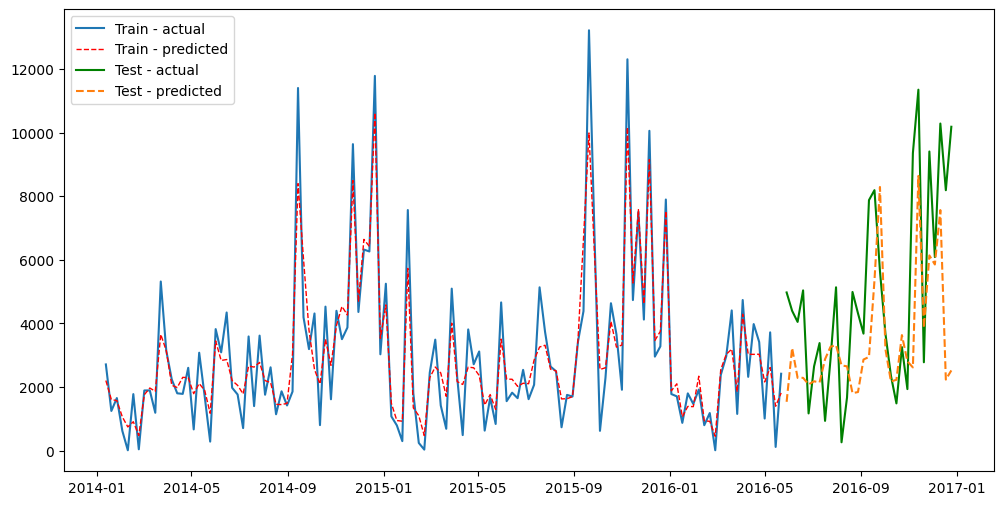

In [52]:
# Для train
train_index = data_train.index[:len(X_train)]
# Для test
test_index = data_train.index[len(X_train):len(X_train)+len(X_test)]

plt.figure(figsize=(12,6))

plt.plot(train_index, y_train, label="Train - actual")
plt.plot(train_index, y_pred_train, linestyle="--", color="red", label="Train - predicted", linewidth=1)

plt.plot(test_index, y_test, label="Test - actual", color='g')
plt.plot(test_index, y_pred_test, linestyle="--", label="Test - predicted")

plt.legend()
plt.show()

In [53]:
joblib.dump(model, 'CatBoost_timerows.pkl')

['CatBoost_timerows.pkl']